In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Para o arquivo dados_jogadores.csv
path_csv = '/content/drive/MyDrive/Colab Notebooks/Projeto jogadores/dados_jogadores.csv'
df_csv = pd.read_csv(path_csv, delimiter=";")
df_csv_original = pd.read_csv(path_csv, delimiter=";")


# Analisando o Data Frame



In [ ]:
df_csv_original.head()

,jogador,genero,data_nascimento,jogo,pais,num_vitorias,num_derrotas,total_partidas
0,jogador 1,Masculino,03/09/1990,Dama,Chile,14.0,0.0,14.0
1,Jogador 2,Feminino,01/05/1986,Jogo da velha,Chile,39.0,20.0,59.0
2,Jogador 3,Masculino,04/10/1964,Jogo da velha,Brasil,26.0,3.0,29.0
3,Jogador 4,Masculino,28/09/1979,Jogo da velha,Argentina,9.0,72.0,81.0
4,Jogador 5,Masculino,03/09/1978,Dama,Uruguai,1.0,54.0,55.0


In [ ]:
df_csv_original.tail()

,jogador,genero,data_nascimento,jogo,pais,num_vitorias,num_derrotas,total_partidas
494,Jogador 495,Feminino,03/06/1974,Dama,Chile,52.0,28.0,80.0
495,Jogador 496,Masculino,09/02/1959,Dama,Chile,13.0,51.0,64.0
496,Jogador 497,Masculino,06/01/1962,Jogo da velha,Argentina,57.0,NaN,80.0
497,Jogador 498,Masculino,28/09/1958,Jogo da velha,Chile,5.0,3.0,8.0
498,Jogador 499,Feminino,08/10/2004,Jogo da velha,Paraguai,1.0,86.0,87.0


In [ ]:
df_csv_original.sample(5)

,jogador,genero,data_nascimento,jogo,pais,num_vitorias,num_derrotas,total_partidas
223,Jogador 224,Feminino,04/05/1969,Dama,Brasil,2.0,8.0,10.0
450,Jogador 451,Feminino,01/09/1976,Dama,Brasil,51.0,29.0,80.0
137,Jogador 138,Feminino,16/02/1963,Jogo da velha,Chile,NaN,28.0,44.0
117,Jogador 118,Masculino,10/09/1991,Xadrez,Chile,28.0,70.0,98.0
392,Jogador 393,Feminino,29/04/1969,Xadrez,Argentina,84.0,1.0,85.0


In [ ]:
df_csv_original.shape

(499, 8)

In [ ]:
df_csv_original.columns

Index(['jogador', 'genero', 'data_nascimento', 'jogo', 'pais', 'num_vitorias',
       'num_derrotas', 'total_partidas'],
      dtype='object')

In [ ]:
df_csv_original.index

RangeIndex(start=0, stop=499, step=1)

In [ ]:
print(df_csv_original.isnull().sum())

jogador            0
genero             0
data_nascimento    0
jogo               0
pais               0
num_vitorias       8
num_derrotas       5
total_partidas     8
dtype: int64


# Normalização dos dados (Tratamento de nulos)

In [ ]:
# Preenchendo 'num_derrotas' quando for nulo
nulos_num_derrotas = df_csv['num_derrotas'].isnull()
df_csv.loc[nulos_num_derrotas, 'num_derrotas'] = df_csv['total_partidas'] - df_csv['num_vitorias']
linhas_editadas_num_derrotas = df_csv[nulos_num_derrotas]

# Preenchendo 'num_vitorias' quando for nulo
nulos_num_vitorias = df_csv['num_vitorias'].isnull()
df_csv.loc[nulos_num_vitorias, 'num_vitorias'] = df_csv['total_partidas'] - df_csv['num_derrotas']
linhas_editadas_num_vitorias = df_csv[nulos_num_vitorias]

# Preenchendo 'total_partidas' quando for nulo
nulos_total_partidas = df_csv['total_partidas'].isnull()
df_csv.loc[nulos_total_partidas, 'total_partidas'] = df_csv['num_derrotas'] + df_csv['num_vitorias']
linhas_editadas_total_partidas = df_csv[nulos_total_partidas]

# Imprimindo linhas editadas antes e depois
print("Linhas editadas em 'num_derrotas':")
print(linhas_editadas_num_derrotas)
print("")

print("Linhas editadas em 'num_vitorias':")
print(linhas_editadas_num_vitorias)
print("")

print("Linhas editadas em 'total_partidas':")
print(linhas_editadas_total_partidas)



Linhas editadas em 'num_derrotas':
         jogador     genero data_nascimento           jogo       pais  \
246  Jogador 247   Feminino      14/02/1954           Dama  Argentina   
255  Jogador 256   Feminino      28/09/2000         Xadrez      Chile   
287  Jogador 288  Masculino      01/02/1952         Xadrez     Brasil   
336  Jogador 337  Masculino      13/06/1996           Dama  Argentina   
496  Jogador 497  Masculino      06/01/1962  Jogo da velha  Argentina   

     num_vitorias  num_derrotas  total_partidas  
246          33.0          56.0            89.0  
255           1.0          72.0            73.0  
287           3.0          14.0            17.0  
336          36.0          28.0            64.0  
496          57.0          23.0            80.0  

Linhas editadas em 'num_vitorias':
         jogador     genero data_nascimento           jogo      pais  \
46    Jogador 47  Masculino      31/01/1978           Dama   Uruguai   
55    Jogador 56   Feminino      27/01/1959   

# Exibindo os primeiros registros do DF após normalização

In [ ]:
print("Exemplo do DataFrame do arquivo CSV:")
print(df_csv.head())

Exemplo do DataFrame do arquivo CSV:
     jogador     genero data_nascimento           jogo       pais  \
0  jogador 1  Masculino      03/09/1990           Dama      Chile   
1  Jogador 2   Feminino      01/05/1986  Jogo da velha      Chile   
2  Jogador 3  Masculino      04/10/1964  Jogo da velha     Brasil   
3  Jogador 4  Masculino      28/09/1979  Jogo da velha  Argentina   
4  Jogador 5  Masculino      03/09/1978           Dama    Uruguai   

   num_vitorias  num_derrotas  total_partidas  
0          14.0           0.0            14.0  
1          39.0          20.0            59.0  
2          26.0           3.0            29.0  
3           9.0          72.0            81.0  
4           1.0          54.0            55.0  


# Respondendo as perguntas com o DF

In [ ]:
# 1    Qual o país que está em segundo lugar no ranking da média geral de vitórias? (independente do jogo)


pais_segundo_ranking = df_csv.groupby('pais')['num_vitorias'].mean().sort_values(ascending=False).index[1]
print("País em segundo lugar no ranking da média geral de vitórias:", pais_segundo_ranking)


País em segundo lugar no ranking da média geral de vitórias: Argentina


In [ ]:
# 2     Qual é a soma de derrotas do Brasil no jogo da Dama?

soma_derrotas_brasil_dama = df_csv[(df_csv['pais'] == 'Brasil') & (df_csv['jogo'] == 'Dama')]['num_derrotas'].sum()
print("Soma de derrotas do Brasil no jogo da Dama:", soma_derrotas_brasil_dama)


Soma de derrotas do Brasil no jogo da Dama: 580.0


In [ ]:
#3     Qual é o jogo preferido entre o público masculino?

jogo_preferido_masculino = df_csv[df_csv['genero'] == 'Masculino']['jogo'].value_counts().idxmax()
print("Jogo preferido entre o público masculino:", jogo_preferido_masculino)


Jogo preferido entre o público masculino: Jogo da velha


In [ ]:
#4    Qual o jogo que possui o maior número de partidas?

jogo_maior_numero_partidas = df_csv.groupby('jogo')['total_partidas'].sum().idxmax()
print("Jogo com o maior número de partidas:", jogo_maior_numero_partidas)


Jogo com o maior número de partidas: Xadrez


In [ ]:
#5 Qual a porcentagem de partidas de cada um dos 3 tipos de jogos?

porcentagem_partidas_por_jogo = df_csv['jogo'].value_counts(normalize=True)
print("Porcentagem de partidas de cada um dos 3 tipos de jogos:")
print(porcentagem_partidas_por_jogo)


Porcentagem de partidas de cada um dos 3 tipos de jogos:
jogo
Xadrez           0.342685
Dama             0.328657
Jogo da velha    0.328657
Name: proportion, dtype: float64


# Exibindo as porcentagens em gráfico

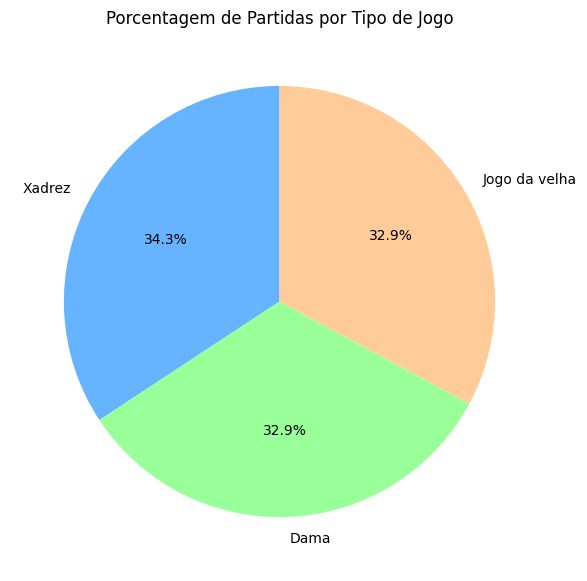

In [ ]:
porcentagem_partidas_por_jogo.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    figsize=(7, 7),
    ylabel='',
    legend=False,
    colors=['#66b3ff', '#99ff99', '#ffcc99']
)

plt.title("Porcentagem de Partidas por Tipo de Jogo")
plt.show()